<a href="https://colab.research.google.com/github/Jeevesh28/SIR-Modelling-Covid-19/blob/main/SIR%20Modelling%20of%20spread%20of%20COVID-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SIR Modelling of spread of COVID-19:**

Models for the outbreak of an infectious disease into a susceptible population using standard epidemiological models. 

* Model 1. SIR Model for an Infectious Disease

* Model 2. SEIR Model 

* Model 3. SEIR Model with Control

## **Model 1. SIR model for an infectious disease:**

### **Introduction to SIR models:**

The SIR model breaks down the population into three-subgroups on the basis of infection.

* **Susceptible.** The subpopulation at risk of contracting the disease
* **Infectious.** The subpopulation that has become infected.
* **Recovered.** The subpopulation that has recovered from infection and is thought to be immune to the disease.


$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $\frac{\beta S I}{N}$ is the rate at which a susceptible population comes into contact with an infected population, resulting in disease transmission. The size of the susceptible population is denoted by the letter S. $\beta$ is a the model parameters with units of 1/day. 
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

A model for the spread of an infectious disease in a uniform population is given by the deterministic SIR equations

\begin{align*}
\frac{dS}{dt} & = -\frac{\beta S I}{N} \\
\frac{dI}{dt} & = \frac{\beta S I}{N} - \gamma I \\
\frac{dR}{dt} & = \gamma I
\end{align*} 

For a more generic model make use of population fraction. For this define:

\begin{align}
s = \frac{S}{N} \qquad
i = \frac{I}{N} \qquad
r = \frac{R}{N}
\end{align} 

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{di}{dt} & = \beta s i - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + i + r = 1$.

* $\beta$ is rate constant associated with transmission of the infection. The corresponding time constant $\tau_{infect} = \frac{1}{\beta}$ corresponds to exponential growth of new infections in an initially susceptible population where $s=1$. 
* $\gamma$ is the rate of recovery from infections. The associated time constant $\tau_{recovery}=\frac{1}{\gamma}$ is average time to recover from an infection.
* The ratio $R_0 = \frac{\beta}{\gamma}$ is the "Basic Reproduction Number" that describes the transmissability or contagiousness of an infectious disease. 
* $R_0$ is the average number of people infected by an index 0 case in an otherwise completely susceptible population. 

### **Simulation:**

* $\tau_{infectious} = \frac{1}{\gamma} = 7.0$ days.
* $R_0 = \frac{\beta}{\gamma} = 2.5$ 
* Population: 22,000 (IIT Kharagpur) 

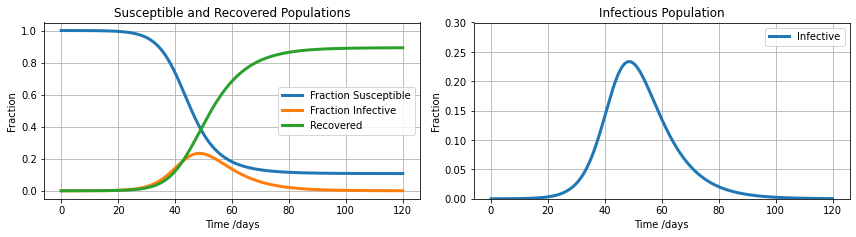

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter values
R0 = 2.5
t_infective = 7.0

# Initial number of infected and recovered individuals
i_initial = 1/22000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial

gamma = 1/t_infective
beta = R0 * gamma

# SIR model differential equations.
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

t = np.linspace(0, 120, 1000)
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(beta, gamma))
s, i, r = soln.T
e = None

def plotdata(t, s, i, e=None):
    # Plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221), 
          fig.add_subplot(222)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')


    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()
    
plotdata(t, s, i)

## **Model 2. SEIR model:**

The SEIR model extends the SIR model by adding an additional population compartment containing those individuals who have been exposed to the virus but not yet infective.

* **Exposed.** The subpopulation that has been exposed to the disease but not yet infective. 

The compartment model can be diagrammed as follows.

$$\text{Susceptible}
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The compartment model is depicted in the diagram below:

* $\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $S$ is the size of the susceptible population. $\beta$ is a the model parameters with units of 1/day. 
* $\alpha E$ is the rate at which exposed population becomes infective, where $E$ is the size of the exposed population. The average period of time in the exposed state is the incubation period of the disease, and equal to $\frac{1}{\alpha}$.
* $\gamma I$ is the rate at which infected population recovers and becomes resistent to further infection. $I$ is the size of the infective population.

An elementary model for the spread of an infectious disease in a uniform population is given by the deterministic SEIR equations}

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{de}{dt} & = \beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$

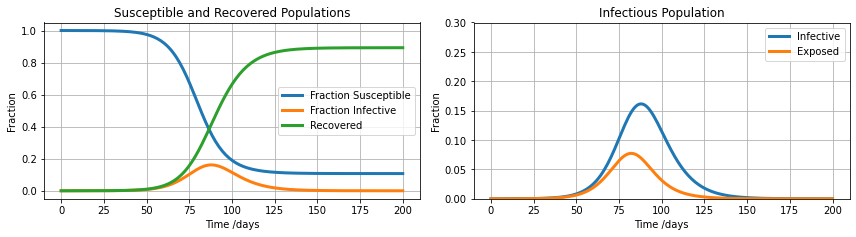

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter values
R0 = 2.5
t_incubation = 3.0
t_infective = 7.0

# Initial number of infected and recovered individuals
e_initial = 1/22000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 200, 200)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, i, e)

**Observations:**
  * The addition of an exposed population compartment slows the outbreak, but doesn't appear to reduce the number of people ultimately infected by the disease.

## **Model 3. SEIR model with Control:**

With vaccines and social distancing norms designed to reduce transmission of the virus from individuals in the infective state to susceptible individuals.

We provide a control parameter u to indicate the success of these attempts for modelling purposes. u=0 denotes no controls, while u=1 denotes complete isolation of infective individuals. The goal of this model is to see how a social distancing approach influences an epidemic's outcome.

The compartment model is depicted in the diagram below:

$$\text{Susceptible}
\xrightarrow{(1-u)\frac{\beta S I}{N}} 
\text{Exposed} 
\xrightarrow{\alpha E} 
\text{Infectious} 
\xrightarrow{\gamma I} 
\text{Recovered} $$

The rate processes are modeled as follows.

* $(1-u)\frac{\beta S I}{N}$ is the rate at which susecptible population encounters the infected population resulting in trasmission of the disease. $u$ describes the effectiveness on any public health interventions to control transmission of the disease. $u=0$ means no effective public health interventions, $u=1$ means total elimination of disease transmission..

After substitution, this results in a system of four equations.

\begin{align*}
\frac{ds}{dt} & = -(1-u)\beta s i \\
\frac{de}{dt} & = (1-u)\beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$.

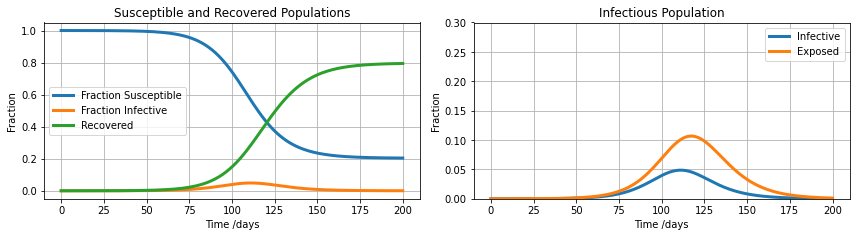

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# parameter values
u = 0.2
R0 = 2.5
t_incubation = 3.0
t_infective = 7.0

# initial number of infected and recovered individuals
e_initial = 1/22000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

# SEIR model differential equations.
def deriv(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 200, 200)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotdata(t, s, e, i)

**Observations:**
* Social distancing measures slows down the progress of the epidemic.
* Reduces the fraction of the population infected at any point in time, thereby reducing strain on health care resources.